# Vector and matrix mathematics 

In [1]:
import numpy as np 
a = np.arange(6).reshape(3,2) 
b = np.arange(10).reshape(2,5) 
print(a) 
print(b)

[[0 1]
 [2 3]
 [4 5]]
[[0 1 2 3 4]
 [5 6 7 8 9]]


In [2]:
np.dot(a,b)

array([[ 5,  6,  7,  8,  9],
       [15, 20, 25, 30, 35],
       [25, 34, 43, 52, 61]])

In [3]:
np.matmul(a,b)

array([[ 5,  6,  7,  8,  9],
       [15, 20, 25, 30, 35],
       [25, 34, 43, 52, 61]])

In [4]:
a@b

array([[ 5,  6,  7,  8,  9],
       [15, 20, 25, 30, 35],
       [25, 34, 43, 52, 61]])

In [5]:
from numpy.linalg import multi_dot 
a = np.arange(12).reshape(4,3) 
b = np.arange(15).reshape(3,5) 
c = np.arange(25).reshape(5,5) 
multi_dot([a, b, c])

array([[ 1700,  1855,  2010,  2165,  2320],
       [ 5300,  5770,  6240,  6710,  7180],
       [ 8900,  9685, 10470, 11255, 12040],
       [12500, 13600, 14700, 15800, 16900]])

In [6]:
a.dot(b).dot(c)

array([[ 1700,  1855,  2010,  2165,  2320],
       [ 5300,  5770,  6240,  6710,  7180],
       [ 8900,  9685, 10470, 11255, 12040],
       [12500, 13600, 14700, 15800, 16900]])

In [7]:
import numpy as np 
from numpy.linalg import multi_dot 
import time 
a = np.arange(120000).reshape(400,300) 
b = np.arange(150000).reshape(300,500) 
c = np.arange(200000).reshape(500,400) 
start = time.time() 
multi_dot([a,b,c]) 
ft = time.time()-start 
print ('Multi_dot tooks', time.time()-start,'seconds.') 
a.dot(b).dot(c) 
print ('Chain dot tooks', time.time()-start-ft,'seconds.')

Multi_dot tooks 0.12232375144958496 seconds.
Chain dot tooks 0.15441036224365234 seconds.


In [8]:
a = np.arange(9).reshape(3,3) 
b = np.arange(3) 
print(a) 
print(b)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[0 1 2]


In [9]:
np.inner(a,b)

array([ 5, 14, 23])

In [10]:
np.outer(a,b)

array([[ 0,  0,  0],
       [ 0,  1,  2],
       [ 0,  2,  4],
       [ 0,  3,  6],
       [ 0,  4,  8],
       [ 0,  5, 10],
       [ 0,  6, 12],
       [ 0,  7, 14],
       [ 0,  8, 16]])

In [11]:
a = np.arange(9) 
np.ndim(a)

1

In [12]:
np.outer(a,b)

array([[ 0,  0,  0],
       [ 0,  1,  2],
       [ 0,  2,  4],
       [ 0,  3,  6],
       [ 0,  4,  8],
       [ 0,  5, 10],
       [ 0,  6, 12],
       [ 0,  7, 14],
       [ 0,  8, 16]])

In [13]:
a = np.arange(12).reshape(2,3,2) 
b = np.arange(48).reshape(3,2,8) 
c = np.tensordot(a,b, axes =([1,0],[0,1])) 
print(a) 
print(b)

[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]]
[[[ 0  1  2  3  4  5  6  7]
  [ 8  9 10 11 12 13 14 15]]

 [[16 17 18 19 20 21 22 23]
  [24 25 26 27 28 29 30 31]]

 [[32 33 34 35 36 37 38 39]
  [40 41 42 43 44 45 46 47]]]


In [14]:
 c

array([[ 800,  830,  860,  890,  920,  950,  980, 1010],
       [ 920,  956,  992, 1028, 1064, 1100, 1136, 1172]])

# What's Eigenvalue and how to compute it ? 

In [15]:
import numpy as np 
from sklearn import decomposition, datasets
from sklearn.preprocessing import StandardScaler 
data = datasets.load_breast_cancer() 
cancer = data.data 
cancer = StandardScaler().fit_transform(cancer) 
cancer.shape

(569, 30)

In [16]:
before_transformation = data.data 
before_transformation[:10,:1]

array([[17.99],
       [20.57],
       [19.69],
       [11.42],
       [20.29],
       [12.45],
       [18.25],
       [13.71],
       [13.  ],
       [12.46]])

In [17]:
cancer[:10,:1]

array([[ 1.09706398],
       [ 1.82982061],
       [ 1.57988811],
       [-0.76890929],
       [ 1.75029663],
       [-0.47637467],
       [ 1.17090767],
       [-0.11851678],
       [-0.32016686],
       [-0.47353452]])

In [18]:
covariance_matrix = np.cov(cancer,rowvar=False)
covariance_matrix.shape

(30, 30)

In [19]:
eig_val_cov, eig_vec_cov = np.linalg.eig(covariance_matrix)
eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i]) for i in range(len(eig_val_cov))]

In [20]:
sorted_pairs = eig_pairs.sort(key=lambda x: x[0], reverse=True)
for i in eig_pairs:
    print(i[0])

13.304990794374557
5.701374603726148
2.8229101550062317
1.9841275177302011
1.6516332423301192
1.2094822398029716
0.6764088817009057
0.47745625468950736
0.41762878210781673
0.3513108748817331
0.2944331534911652
0.26162116136612107
0.24178242132831376
0.15728614921759343
0.09430069560105549
0.0800034044773769
0.05950361353043193
0.052711422210147865
0.049564700212981636
0.031214260553066364
0.030025663090428353
0.027487711338904493
0.024383691354591026
0.018086793984305585
0.015508527134418866
0.008192037117606807
0.006912612579184545
0.00159213600119781
0.0007501214127185791
0.00013327905666374494


In [21]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(30,1), eig_pairs[1][1].reshape(30,1)))
matrix_w.shape 
transformed = matrix_w.T.dot(cancer.T) 
transformed = transformed.T 
transformed[0]

array([9.19283683, 1.94858307])

In [22]:
transformed.shape

(569, 2)

In [23]:
import numpy as np 
from sklearn import decomposition 
from sklearn import datasets 
from sklearn.preprocessing import StandardScaler 
pca = decomposition.PCA(n_components=2) 
x_std = StandardScaler().fit_transform(cancer)
pca.fit_transform(x_std)[0]

array([9.19283683, 1.94858307])

# Computing Norm and Determinant

In [24]:
import numpy as np 
x = np.array([2,5,9,0]) 
np.linalg.norm(x,ord=0)

3.0

In [25]:
np.linalg.norm(x,ord=1)

16.0

In [26]:
np.linalg.norm(x,ord=2)

10.488088481701515

In [27]:
a = np.array([3,7,6,-2,-5,4,1,3,-14]).reshape(3,3)


array([[  3,   7,   6],
       [ -2,  -5,   4],
       [  1,   3, -14]])

In [28]:
a

array([[  3,   7,   6],
       [ -2,  -5,   4],
       [  1,   3, -14]])

In [29]:
np.linalg.norm(a, ord=1)

24.0

In [30]:
np.linalg.norm(a, np.inf)

18.0

In [31]:
np.linalg.norm(a, ord=2)

15.8325010064061

In [32]:
A= np.array([2,3,1,4]).reshape(2,2)


In [33]:
A

array([[2, 3],
       [1, 4]])

In [34]:
np.linalg.det(A)

5.000000000000001

In [35]:
B= np.array([2,3,5,1,4,8,5,6,2]).reshape(3,3)


array([[2, 3, 5],
       [1, 4, 8],
       [5, 6, 2]])

In [36]:
B

array([[2, 3, 5],
       [1, 4, 8],
       [5, 6, 2]])

In [37]:
np.linalg.det(B)

-36.0

In [38]:
a=np.arange(9).reshape(3,3)


In [39]:
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [40]:
np.trace(a)

12

In [41]:
b = np.arange(27).reshape(3,3,3)


In [42]:
b

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [43]:
np.trace(b)

array([36, 39, 42])

# Solving Equations

In [44]:
A = np.array([[2, 1, 2], [3, 2, 1], [0, 1, 1]])
A

array([[2, 1, 2],
       [3, 2, 1],
       [0, 1, 1]])

In [45]:
B = np.array([8,3,4])
B

array([8, 3, 4])

In [46]:
A_inv = np.linalg.inv(A)
A_inv

array([[ 0.2,  0.2, -0.6],
       [-0.6,  0.4,  0.8],
       [ 0.6, -0.4,  0.2]])

In [47]:
np.dot(A_inv,B)

array([-0.2, -0.4,  4.4])

In [48]:
A = np.array([[2, 1, 2], [3, 2, 1], [0, 1, 1]]) 
B = np.array([8,3,4]) 
x = np.linalg.solve(A, B) 
x

array([-0.2, -0.4,  4.4])

In [49]:
np.allclose(np.dot(A, x), B)

True

In [50]:
from numpy import arange,array,ones,linalg
from pylab import plot,show
x = np.arange(1,11) 
A = np.vstack([x, np.ones(len(x))]).T
A

array([[ 1.,  1.],
       [ 2.,  1.],
       [ 3.,  1.],
       [ 4.,  1.],
       [ 5.,  1.],
       [ 6.,  1.],
       [ 7.,  1.],
       [ 8.,  1.],
       [ 9.,  1.],
       [10.,  1.]])

In [51]:
y = [5, 6, 6.5, 7, 8,9.5, 10, 10.4,13.1,15.5] 
w = linalg.lstsq(A,y)[0] 
w

c:\users\mert_cuhadaroglu\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


array([1.05575758, 3.29333333])

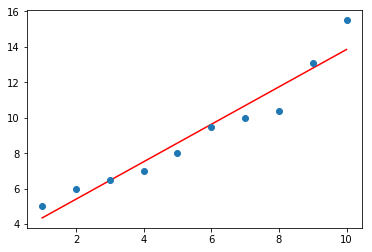

In [52]:
line = w[0]*x+w[1] 
plot(x,line,'r-',x,y,'o') 
show()

# Computing Gradient

In [53]:
a = np.array([1,3, 6, 7, 11, 14]) 
gr = np.gradient(a) 
gr

array([2. , 2.5, 2. , 2.5, 3.5, 3. ])

In [54]:
a = np.array([1,3, 6, 7, 11, 14]). reshape(2,3) 
gr = np.gradient(a) 
gr

[array([[6., 8., 8.],
        [6., 8., 8.]]), array([[2. , 2.5, 3. ],
        [4. , 3.5, 3. ]])]